加载必要的库

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.stats import chi2_contingency
sns.set(palette="muted", color_codes=True)

In [2]:
df = pd.read_csv(".\数据集\TrainingData.csv", header=0)
df.head()

,Quote_Id,Quote_Date,Quote_Flag,Field_info1,Field_info2,Field_info3,Field_info4,Coverage_info1,Coverage_info2,Coverage_info3,...,Property_info1,Property_info2,Property_info3,Property_info4,Property_info5,Geographic_info1,Geographic_info2,Geographic_info3,Geographic_info4,Geographic_info5
0,2,14/5/14,0,B,0.9153,935,N,5,2,D,...,N,0,D,1,6,2,13,-1,N,CA
1,3,19/6/13,0,J,0.9691,"1,165",N,5,22,F,...,N,0,D,1,8,14,7,-1,N,TX
2,6,6/2/15,0,B,0.9153,935,N,6,22,D,...,N,0,D,1,11,2,12,-1,N,CA
3,9,15/10/14,0,J,0.8793,"1,113",N,1,22,F,...,N,0,O,0,1,14,6,-1,N,TX
4,10,30/3/15,1,F,1.0101,548,N,13,22,E,...,N,0,R,1,25,4,22,-1,N,NJ


查看数据信息

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62580 entries, 0 to 62579
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Quote_Id          62580 non-null  int64  
 1   Quote_Date        62580 non-null  object 
 2   Quote_Flag        62580 non-null  int64  
 3   Field_info1       62580 non-null  object 
 4   Field_info2       62580 non-null  float64
 5   Field_info3       62580 non-null  object 
 6   Field_info4       62580 non-null  object 
 7   Coverage_info1    62580 non-null  int64  
 8   Coverage_info2    62580 non-null  int64  
 9   Coverage_info3    62580 non-null  object 
 10  Sales_info1       62580 non-null  int64  
 11  Sales_info2       62580 non-null  int64  
 12  Sales_info3       62580 non-null  int64  
 13  Sales_info4       62580 non-null  object 
 14  Sales_info5       62580 non-null  int64  
 15  Personal_info1    62557 non-null  object 
 16  Personal_info2    62580 non-null  int64 

查看其它信息

In [4]:
df.shape

(62580, 30)

In [5]:
df.columns

Index(['Quote_Id', 'Quote_Date', 'Quote_Flag', 'Field_info1', 'Field_info2',
       'Field_info3', 'Field_info4', 'Coverage_info1', 'Coverage_info2',
       'Coverage_info3', 'Sales_info1', 'Sales_info2', 'Sales_info3',
       'Sales_info4', 'Sales_info5', 'Personal_info1', 'Personal_info2',
       'Personal_info3', 'Personal_info4', 'Personal_info5', 'Property_info1',
       'Property_info2', 'Property_info3', 'Property_info4', 'Property_info5',
       'Geographic_info1', 'Geographic_info2', 'Geographic_info3',
       'Geographic_info4', 'Geographic_info5'],
      dtype='object')

查看Quote_Flag属性的取值

In [6]:
df['Quote_Flag'].value_counts()

0    50625
1    11955
Name: Quote_Flag, dtype: int64

In [7]:
df['Personal_info5'].value_counts()

2.0    32409
1.0      364
5.0       18
3.0        1
Name: Personal_info5, dtype: int64

In [8]:
##统计Personal_info5缺失值情况
df['Personal_info5'].isnull().sum()

29788

In [9]:
##统计所有变量缺失值情况
df.isnull().sum()

Quote_Id                0
Quote_Date              0
Quote_Flag              0
Field_info1             0
Field_info2             0
Field_info3             0
Field_info4             0
Coverage_info1          0
Coverage_info2          0
Coverage_info3          0
Sales_info1             0
Sales_info2             0
Sales_info3             0
Sales_info4             0
Sales_info5             0
Personal_info1         23
Personal_info2          0
Personal_info3          0
Personal_info4          0
Personal_info5      29788
Property_info1         16
Property_info2          0
Property_info3          0
Property_info4          0
Property_info5          0
Geographic_info1        0
Geographic_info2        0
Geographic_info3        0
Geographic_info4        1
Geographic_info5        0
dtype: int64

In [10]:
##选取类别型变量
A=df.select_dtypes(include='object')
A.head()                    

,Quote_Date,Field_info1,Field_info3,Field_info4,Coverage_info3,Sales_info4,Personal_info1,Personal_info3,Property_info1,Property_info3,Geographic_info4,Geographic_info5
0,14/5/14,B,935,N,D,T,N,ZA,N,D,N,CA
1,19/6/13,J,"1,165",N,F,P,N,XR,N,D,N,TX
2,6/2/15,B,935,N,D,V,N,ZA,N,D,N,CA
3,15/10/14,J,"1,113",N,F,Q,N,ZA,N,O,N,TX
4,30/3/15,F,548,N,E,K,N,XD,N,R,N,NJ


In [11]:
##选取数值型变量
B=df.select_dtypes(include=['int64','float'])
B.head()

,Quote_Id,Quote_Flag,Field_info2,Coverage_info1,Coverage_info2,Sales_info1,Sales_info2,Sales_info3,Sales_info5,Personal_info2,Personal_info4,Personal_info5,Property_info2,Property_info4,Property_info5,Geographic_info1,Geographic_info2,Geographic_info3
0,2,0,0.9153,5,2,1,5,11,55101,-1,0,2.0,0,1,6,2,13,-1
1,3,0,0.9691,5,22,1,5,1,5476,-1,0,NaN,0,1,8,14,7,-1
2,6,0,0.9153,6,22,1,5,11,59655,18,0,2.0,0,1,11,2,12,-1
3,9,0,0.8793,1,22,1,5,11,6943,5,0,2.0,0,0,1,14,6,-1
4,10,1,1.0101,13,22,1,3,20,61148,6,0,NaN,0,1,25,4,22,-1


In [15]:
##更改变量类型（注意如下命令并不能改变原数据框内的值）
df['Coverage_info2'].astype("object")

0         2
1        22
2        22
3        22
4        22
         ..
62575    25
62576     2
62577    22
62578    25
62579    22
Name: Coverage_info2, Length: 62580, dtype: object

In [16]:
df['Coverage_info2'].dtypes

dtype('int64')

In [17]:
##用变量赋值的方式更改原数据框内的值
df['Coverage_info2']=df['Coverage_info2'].astype("object")
df['Coverage_info2'].dtypes

dtype('O')

In [18]:
##更改原类型
df['Coverage_info2']=df['Coverage_info2'].astype("int64")
df['Coverage_info2'].dtypes

dtype('int64')

In [19]:
##类别型变量统计信息
A_describe=A.describe()
A_describe.T

,count,unique,top,freq
Quote_Date,62580,868,3/3/14,172
Field_info1,62580,8,B,22809
Field_info3,62580,8,935,12478
Field_info4,62580,2,N,58072
Coverage_info3,62580,12,E,20498
Sales_info4,62580,7,K,12037
Personal_info1,62557,2,N,62265
Personal_info3,62580,38,ZA,29837
Property_info1,62564,2,N,54423
Property_info3,62580,17,O,17883


In [18]:
##数值型变量统计信息
B_describe=B.describe()
B_describe.T

,count,mean,std,min,25%,50%,75%,max
Quote_Id,62580.0,52125.978923,30130.035087,2.0000,25980.7500,51989.0000,78291.5000,104301.0000
Quote_Flag,62580.0,0.191035,0.393120,0.0000,0.0000,0.0000,0.0000,1.0000
Field_info2,62580.0,0.938307,0.037030,0.8746,0.9153,0.9403,0.9685,1.0101
Coverage_info1,62580.0,8.999057,5.575434,-1.0000,5.0000,8.0000,12.0000,25.0000
Coverage_info2,62580.0,21.197779,4.926863,1.0000,22.0000,22.0000,22.0000,25.0000
Sales_info1,62580.0,0.745973,0.435316,0.0000,0.0000,1.0000,1.0000,1.0000
Sales_info2,62580.0,4.223474,0.977803,1.0000,3.0000,5.0000,5.0000,5.0000
Sales_info3,62580.0,13.992410,6.296919,1.0000,11.0000,11.0000,20.0000,24.0000
Sales_info5,62580.0,33738.501135,19521.641287,4.0000,16776.7500,33912.0000,50734.2500,67162.0000
Personal_info2,62580.0,6.905225,6.727773,-1.0000,4.0000,6.0000,9.0000,25.0000


D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales_info5', ylabel='Density'>

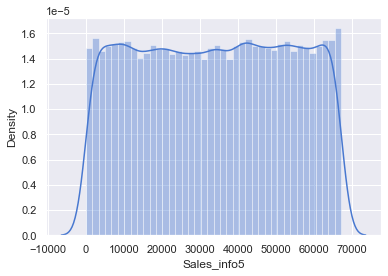

In [19]:
##数值型变量：概率密度图+直方图
sns.distplot(B['Sales_info5']) 

<AxesSubplot:title={'center':'Sales_info5'}>

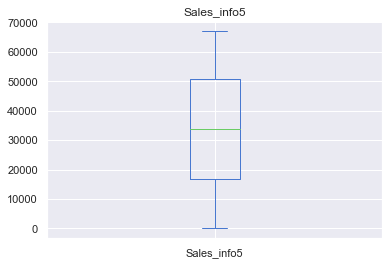

In [20]:
##数值型变量：箱图
B['Sales_info5'].plot(kind='box',title='Sales_info5')

<AxesSubplot:>

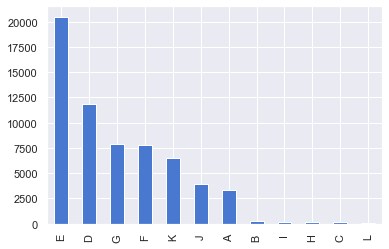

In [21]:
##类别型变量：条形图
A['Coverage_info3'].value_counts().plot(kind='bar')

<AxesSubplot:title={'center':'Field_info2'}>

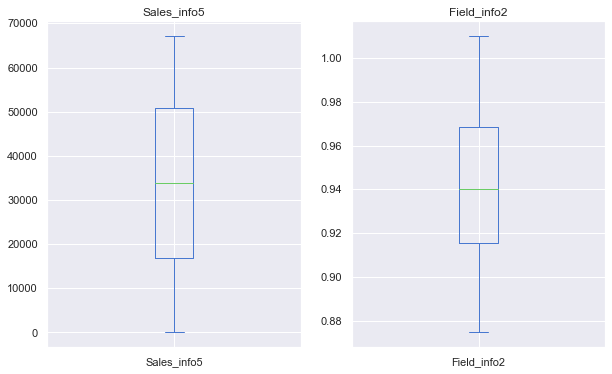

In [22]:
##子图画法
plt.figure(figsize=(10,6))
plt.subplot(121)
B['Sales_info5'].plot(kind='box',title='Sales_info5')
plt.subplot(122)
B['Field_info2'].plot(kind='box',title='Field_info2')

<AxesSubplot:title={'center':'Field_info3'}>

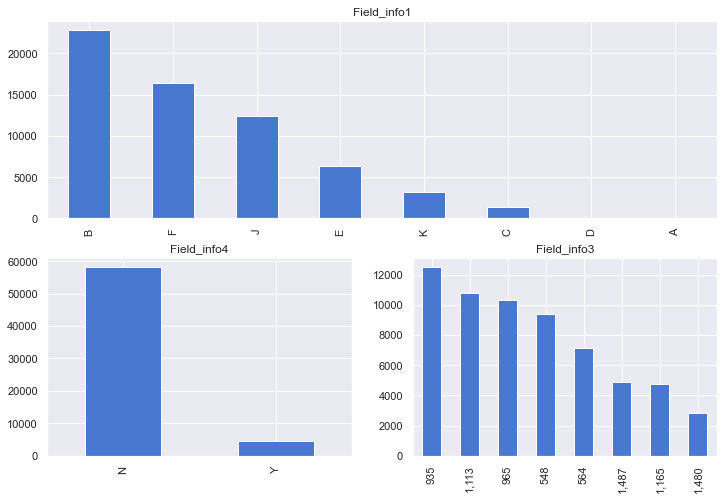

In [23]:
plt.figure(figsize=(12,8))
plt.subplot(211)
A['Field_info1'].value_counts().plot(kind='bar',title='Field_info1')
plt.subplot(223)
A['Field_info4'].value_counts().plot(kind='bar',title='Field_info4')
plt.subplot(224)
A['Field_info3'].value_counts().plot(kind='bar',title='Field_info3')

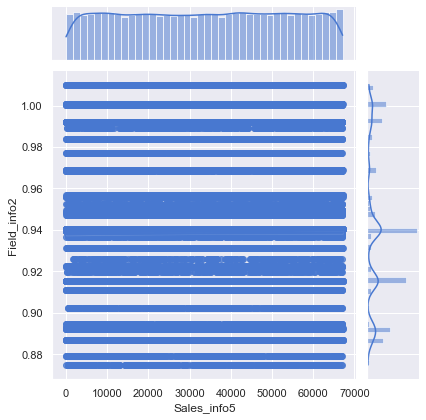

In [24]:
## 两个变量关系图：组合散点图+回归图
sns.jointplot(x='Sales_info5', y='Field_info2', data=B,kind='reg')

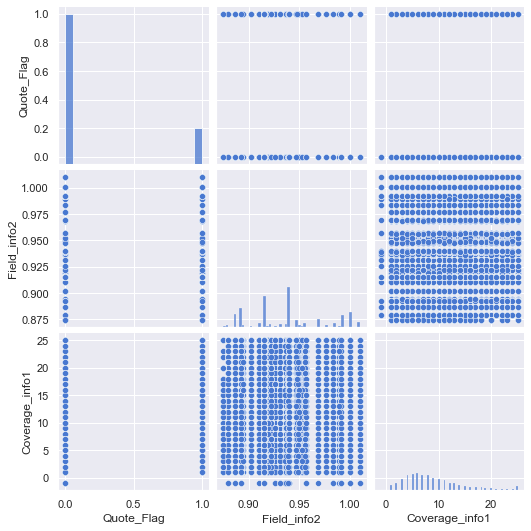

In [25]:
##两个变量关系图：散点图矩阵
sns.pairplot(B.iloc[:,1:4])

In [26]:
##查看A当中的缺失值情况
A1=A.isnull().sum()
A1

Quote_Date           0
Field_info1          0
Field_info3          0
Field_info4          0
Coverage_info3       0
Sales_info4          0
Personal_info1      23
Personal_info3       0
Property_info1      16
Property_info3       0
Geographic_info4     1
Geographic_info5     0
dtype: int64

In [27]:
##找到有缺失值的属性
A1[A1>0]

Personal_info1      23
Property_info1      16
Geographic_info4     1
dtype: int64

In [28]:
##对A缺失值填成none
A=A.fillna('None')
A.isnull().sum()

Quote_Date          0
Field_info1         0
Field_info3         0
Field_info4         0
Coverage_info3      0
Sales_info4         0
Personal_info1      0
Personal_info3      0
Property_info1      0
Property_info3      0
Geographic_info4    0
Geographic_info5    0
dtype: int64

In [29]:
##对B中是-1的情况
(B==-1).sum()

Quote_Id                0
Quote_Flag              0
Field_info2             0
Coverage_info1         86
Coverage_info2          0
Sales_info1             0
Sales_info2             0
Sales_info3             0
Sales_info5             0
Personal_info2      13184
Personal_info4          0
Personal_info5          0
Property_info2          0
Property_info4          0
Property_info5          5
Geographic_info1        1
Geographic_info2        1
Geographic_info3    61064
dtype: int64

In [30]:
##对B中Coverage_info1是-1的进行填充
B['Coverage_info1'].mask(B['Coverage_info1'] == -1,0,inplace=True)

C:\Users\17630\AppData\Roaming\Python\Python39\site-packages\pandas\core\generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [31]:
##查看结果
(B['Coverage_info1']==-1).sum()

0